In [46]:
import numpy as np
from numpy import fft
import pandas as pd
import librosa
from os import listdir
from librosa import display
import matplotlib.pyplot as plt
import pickle
from scipy import signal
from scipy import stats
from scipy import fftpack
import seaborn as sns

In [17]:
#Read in the paths to all the audio files. audio_paths is a dictionary.
audio_paths = pickle.load(open( "subset_audio_paths", "rb" ) )
df = pd.read_csv('subset_audio')

In [256]:
keys_list = list(audio_paths.keys())

In [432]:
#Creating a subset of Data. Extracting the FFT's for 1 second of Audio taken in the middle of the file.
subset_df = pd.DataFrame()
for key, value in audio_paths.items():
    gender = df.iloc[df[df['VoxCeleb2 ID'] == key].index]['Gender'].values[0]
    for values in value:
        temp_df = pd.DataFrame(fft(values, 4, 16384)).T
        temp_df['Gender'] = gender
        subset_df = subset_df.append(temp_df)

In [434]:
#Saving the subset of data that is in FFT format
subset_df.to_csv('subset_df_fft')

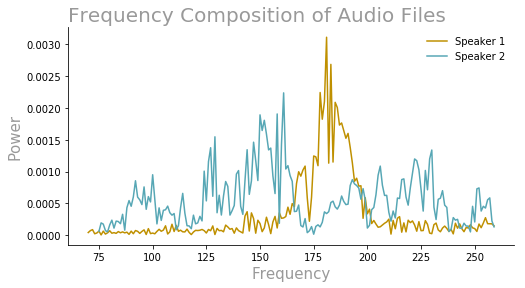

In [95]:
#Plotting Two Audio File's FFTS
def plot_frequency(female, male)
    fig = plt.figure(figsize=(8,4))
    plot_fft_f(female,4, 16384)
    plot_fft_m(male,4, 16384)
    plt.title('Frequency Composition of Audio Files',loc='left', size=20, color = '#999999')
    plt.ylabel('Power', size=15, color='#999999')
    plt.xlabel('Frequency', size=15, color='#999999')
    sns.despine()
    plt.legend(frameon=False)

In [5]:
#Graphing one audio's FFT
def graph_individual_fft(key):
    gender = df.iloc[df[df['VoxCeleb2 ID'] == key].index]['Gender'].values[0]
    for value in audio_paths[key]:
        if gender == 'm':
            plot_fft_m(value, 4, 16384)
        else:
            plot_fft_f(value, 4, 16384)

In [89]:
#Plotting FFT for male speakers
def plot_fft_m(path, length, sr):
    #Path: path to the file
    #length: length of audio file to be sampled
    #sr:sampling rate
    y, sr = librosa.load(path, duration = length, sr = sr)
    n = len(y)//2 # length of the signal
    half_second = sr//2
    y=y[range(n-half_second, n+half_second)]
    n = len(y)
    k = np.arange(n)
    T = n/sr
    frq = k/T # two sides frequency range
    frq = frq[range(75, 260)] # one side frequency range

    Ymale = fftpack.fft(y)/n # fft computing and normalization
    Ymale = Ymale[range(75, 260)]

#     plt.figure(figsize=(4,4))
    plt.plot(frq,abs(Ymale),color = '#57a7b5ff', label='Speaker 2') # plotting the spectrum
#     plt.title('Male')
#     plt.xlabel('Freq (Hz)')
#     plt.ylabel('|Y(freq)|')

In [88]:
#Plotting FFT for female speakers
def plot_fft_f(path, length, sr):
    #Path: path to the file
    #length: length of audio file to be sampled
    #sr:sampling rate
    y, sr = librosa.load(path, duration = length, sr = sr)
    n = len(y)//2 # length of the signal
    half_second = sr//2
    y=y[range(n-half_second, n+half_second)]
    n = len(y)
    k = np.arange(n)
    T = n/sr
    frq = k/T # two sides frequency range
    frq = frq[range(70,260)] # one side frequency range

    Yfemale = fftpack.fft(y)/n # fft computing and normalization
    Yfemale = Yfemale[range(70,260)]

#     plt.figure(figsize=(4,4))
    plt.plot(frq,abs(Yfemale), color = '#bf9000ff', label ='Speaker 1') # plotting the spectrum
#     plt.title('Female')
#     plt.xlabel('Freq (Hz)')
#     plt.ylabel('|Y(freq)|')

0 0
id04239
id08457
id02827
id04297
id04304
id07437
id01808
id06953
id04484
id05343
20
1 0
id07154
id05034
id04197
id00701
id07768
id06535
id07526
id00784
id01056
id02964
30
0 1
id02450
id01306
id06096
id07688
id00579
id05209
id05843
id08046
id05625
id05308
40
1 1
id08737
id02991
id05771
id08106
id08027
id09123
id00677
id04175
id01760
id03290
50


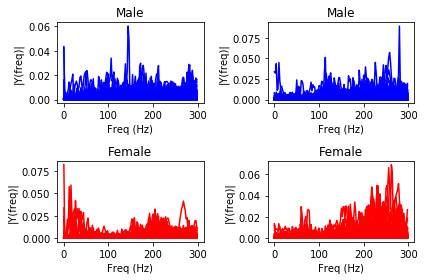

In [316]:
#Graphing FFT of 10 people at once.
nx = 2
ny = 2
count = 10
start = 0

# Iterate over the axes
fig = plt.gcf()
# fig = plt.figure(figsize=(6, 4))
for y in np.arange(nx):
    for x in np.arange(ny):
        plt.subplot(nx, ny, y * ny + x + 1)  # Add one for 1-indexing
        for i in range(start, count):
            graph_individual_fft(keys_list[i])
        start = count
        count +=10
fig.tight_layout()

In [425]:
#This function takes a path, length of file, and sampling rate.
#Returns the FFT for that audio file.
def fft(path, length, sr):
    y, sr = librosa.load(path, duration = length, sr = sr)
    n = len(y)//2 # length of the signal
    half_second = sr//2
    y=y[range(n-half_second, n+half_second)]
    y_fft = fftpack.fft(y) # fft computing and normalization
    y_fft = y_fft[range(70,260)]
    return abs(y_fft)

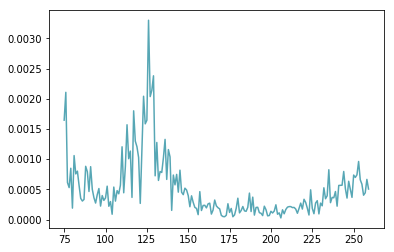

In [110]:
# plot_fft_m('/Users/kevin/Desktop/Jon.m4a',4, 16384)
plot_fft_m('/Users/kevin/Desktop/Chris.m4a',4, 16384)
# plot_fft_f('/Users/kevin/Desktop/Carolina.m4a',4, 16384)
# plot_fft_f('/Users/kevin/Desktop/Ahma2.m4a',4, 16384)


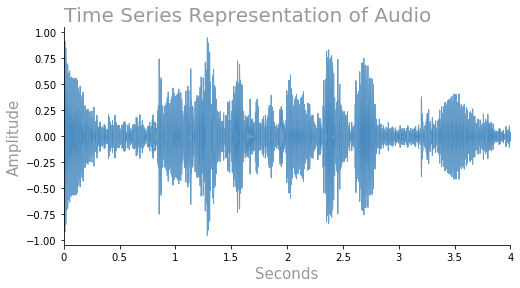

In [53]:
#Visualizing amplitutde as a time series
def time_series(path, length, sr):
    y, sr = librosa.load(path, duration = length, sr = sr)
    plt.figure(figsize=(8,4))
    plt.title('Time Series Representation of Audio', loc='left', size=20, color = '#999999')
    display.waveplot(y, sr=sampling_rate, color = '#3a81baff', alpha=0.75)
    ylabel('Amplitude', size=15, color='#999999')
    xlabel('Seconds', size=15, color='#999999')
    sns.despine()

In [57]:
#Speaker Recognition
y, sr = librosa.load(audio_paths['id01760'][2], duration = 4.0, sr = 16384)

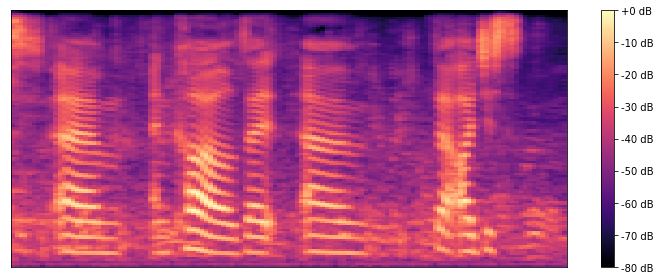

In [94]:
#Graphing a sample mel-spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(10,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr)

# Put a descriptive title on the plot
# plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
# plt.savefig('spectrogram')